## Clustering for Credit Cards dataset

I will apply my knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

In [1]:
# Start by Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing imports
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# metrics imports
from sklearn.metrics import silhouette_score

# model imports
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [2]:
# reading the data into df
df = pd.read_csv("./CC GENERAL.csv")

In [3]:
df.shape

(8950, 18)

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### About the Dataset:
This case requires to develop a customer segmentation to define marketing strategy. Thesample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.


#### Following is the Data Dictionary for Credit Card dataset :-
`CUSTID` : Identification of Credit Card holder.

`BALANCE` : Balance amount left in their account to make purchases.

`BALANCEFREQUENCY` : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated). 

`PURCHASES` : Amount of purchases made from account.

`ONEOFFPURCHASES` : Maximum purchase amount done in one-go.

`INSTALLMENTSPURCHASES` : Amount of purchase done in installment.

`CASHADVANCE` : Cash in advance given by the user.

`PURCHASESFREQUENCY` : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).

`ONEOFFPURCHASESFREQUENCY` : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).

`PURCHASESINSTALLMENTSFREQUENCY` : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).

`CASHADVANCEFREQUENCY` : How frequently the cash in advance being paid (1 = frequently paid, 0 = not frequently paid).

`CASHADVANCETRX` : Number of Transactions made with "Cash in Advanced".

`PURCHASESTRX` : Numbe of purchase transactions made.

`CREDITLIMIT` : Limit of Credit Card for user

`PAYMENTS` : Amount of Payment done by user.

`MINIMUM_PAYMENTS` : Minimum amount of payments made by user.

`PRCFULLPAYMENT` : Percent of full payment paid by user.

`TENURE` : Tenure of credit card service for user.

In [5]:
# make all column name lower case
df.columns = df.columns.str.lower()

In [6]:
# get the df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [7]:
# update columns name to have more explicit meaning
df.rename(columns={"cash_advance_trx":"cash_advance_transactions", "purchases_trx":"purchases_transactions",
                   "payments":"payments_done", "prc_full_payment":"percent_full_payment"}, inplace = True)

In [8]:
df.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_transactions', 'purchases_transactions', 'credit_limit',
       'payments_done', 'minimum_payments', 'percent_full_payment', 'tenure'],
      dtype='object')

In [9]:
# drop the identification columns
df.drop("cust_id", inplace = True, axis = 1)

### Data Completness

In [10]:
# null values count
df.isnull().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_transactions             0
purchases_transactions                0
credit_limit                          1
payments_done                         0
minimum_payments                    313
percent_full_payment                  0
tenure                                0
dtype: int64

In [11]:
# percentages of null values 
def null_percent(df):
    # init the list of (column_index, null percentage)
    percent_list = []
    
    # get a list of the null counts
    null_count = df.isnull().sum().values
    
    # get the total count of the observations
    total_count = df.shape[0]
    
    # calulate the null percentages
    for i in range(len(null_count)):
        null_percent = round(null_count[i] / total_count, 2)
        
        percent_list.append((i, null_percent))
        
    return percent_list

In [12]:
# print the null percentages
print(null_percent(df))

[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.03), (15, 0.0), (16, 0.0)]


In [13]:
"""
Drop the null values as it represent small percentage of our data to not affect the model
"""
df.dropna(inplace = True)

In [14]:
# check for null values
df.isnull().sum().sum()

0

### Data Exploration

In [15]:
# Get the summary Statistics values
summary_stats = pd.DataFrame(df.describe())
summary_stats

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_transactions,purchases_transactions,credit_limit,payments_done,minimum_payments,percent_full_payment,tenure
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [16]:
# most of the feature are balance and purchase related  feature / frequency related feature
# create two bins for balance and frequency

# freq bin size = .1 as its value range from 0 --> 1
freq_bins = np.arange(0, 1.1, .1)
# balance bin size = 1000 as its value range from 0 --> 20000
balance_bins = np.arange(0, 20000, 1000)

# tenture bins bin size = 1 as its value range from 0 --> 12
tenure_bins = np.arange(0, 13, 1)

# create the custmized histogram function
def hist(df, variable, bins):
    sns.displot(data = df, x = variable, bins = bins);

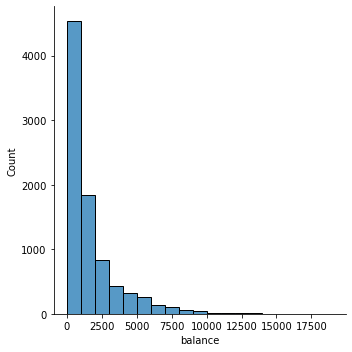

In [17]:
# explore balance distribution
hist(df, "balance", balance_bins)

In balance Feature the data is very positivly skewed, means the most of the data point have low balence amount
, I will minimize the bins size for more investigation.

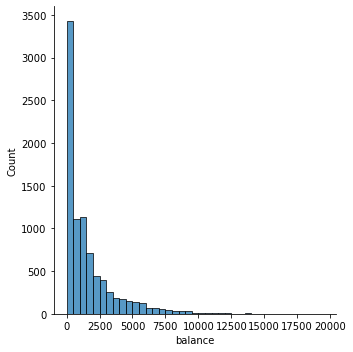

In [18]:
# investigate the balance column with smaller bin sizes
balance_bins_small = np.arange(0, 20000, 500)
hist(df, "balance", balance_bins_small)

We have alot of values lower than 500, using box plot to explore outliers

In [19]:
# investigate the balence feature using box plot
# def custom boxplot function
def boxplot(df_variable):
    plt.figure(figsize=(15,10))
    sns.boxplot(data = df_variable, orient = "h")

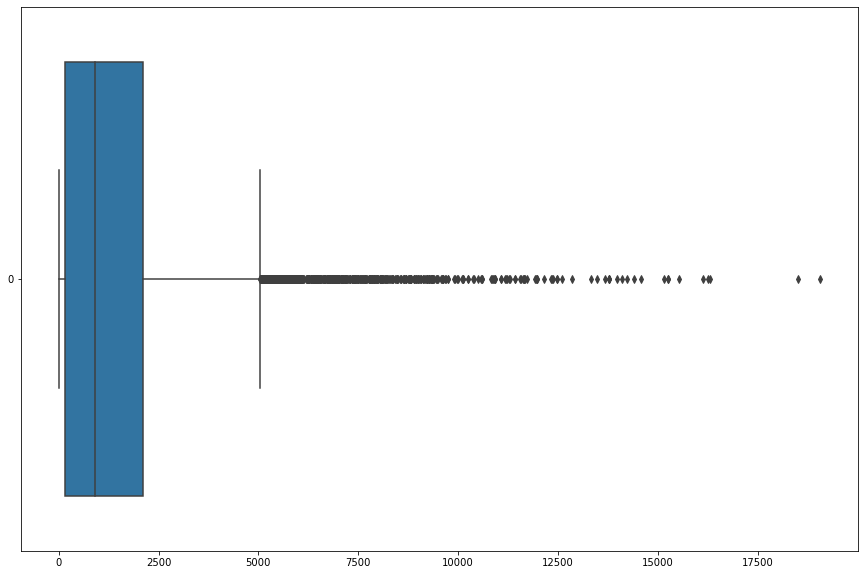

In [20]:
boxplot(df.balance)

In [21]:
# define a function for outliers analysis
def outliers_analysis(df, variable, summary_stats_df):
    # get the box highest whisker value
    IQR_balance = summary_stats["{}".format(variable)].loc["75%"] - summary_stats["{}".format(variable)].loc["25%"]
    box_highest_whisker = round(IQR_balance * 1.5, 2)
    
    # get the summary statistics for balance outliers values
    variable_outliers = df[df["{}".format(variable)] > box_highest_whisker]["{}".format(variable)]
    outliers_summary = pd.DataFrame(variable_outliers.describe())
    
    # get the outliers unique occurance values
    unique_occurance_values = variable_outliers.value_counts().unique()
    
    # return the summary df and list of unique observation values
    return outliers_summary, unique_occurance_values

In [22]:
balance_outlier_summary, balance_outliers_observations_count = outliers_analysis(df, "balance", summary_stats)

In [23]:
balance_outlier_summary

,balance
count,1465.000000
mean,5404.604373
std,2297.671790
min,2936.438250
25%,3714.539663
50%,4784.708882
75%,6388.108487
max,19043.138560


In [24]:
balance_outliers_observations_count

array([1], dtype=int64)

- Outliers count = 1465 means it form a relatively big group of the data points
- From outliers summary after the Third Quartile [75%],in the fourth Quartile we have extreme outliers vary by nearly __13000__
- All of the outliers, has 1 time observation for each value

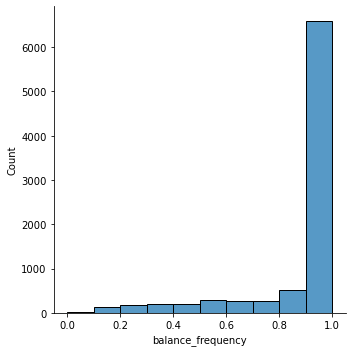

In [25]:
# explore balance distribution
hist(df, "balance_frequency", freq_bins)

From balance_frequency feature distribution, most of the accounts'balance is frequently updated

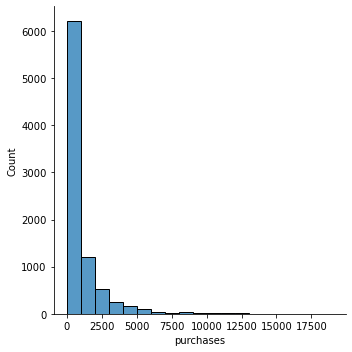

In [26]:
# explore purchases distribution 
hist(df, "purchases", balance_bins)

Purchases has the same distribution shape as balance, investigate more with smaller bins and boxplot

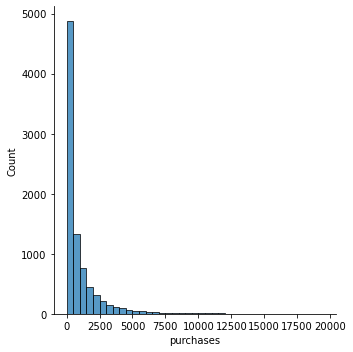

In [27]:
# explore purchases distribution with smaller bin size
hist(df, "purchases", balance_bins_small)

Here also we have many observations below 500, more investigation with box plot

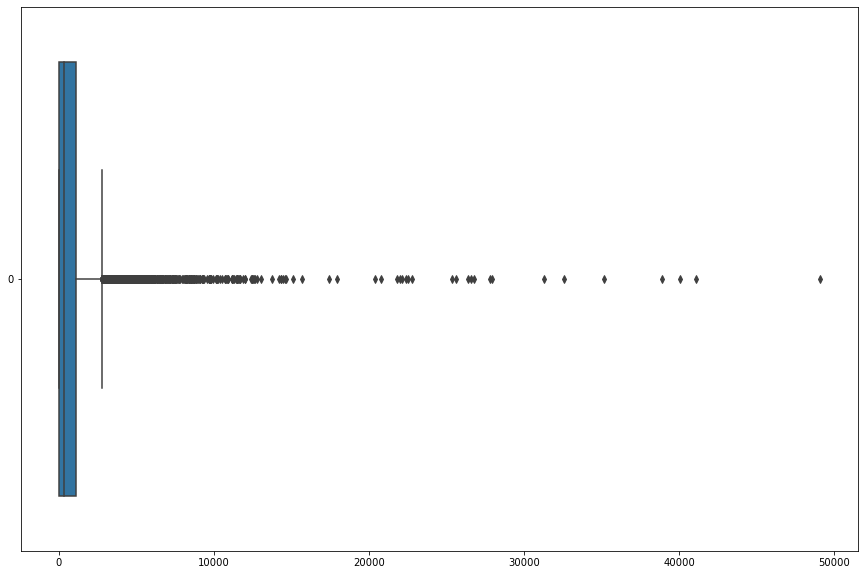

In [28]:
# explore purchases distribution with boxplot
boxplot(df.purchases)

In [29]:
# outlier analysis for purchases features
purchases_outlier_summary, purchases_outliers_observations_count = outliers_analysis(df, "purchases", summary_stats)

In [30]:
purchases_outlier_summary

,purchases
count,1513.000000
mean,4004.261335
std,3892.903652
min,1654.940000
25%,2118.660000
50%,2823.800000
75%,4378.800000
max,49039.570000


In [31]:
purchases_outliers_observations_count

array([4, 3, 2, 1], dtype=int64)

- Outliers values is getting high exponentially, have a large standard deviation 

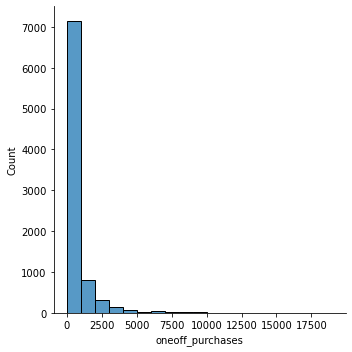

In [32]:
# explore oneoff_purchases distribution
hist(df, "oneoff_purchases", balance_bins)

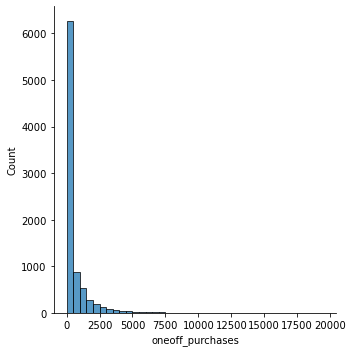

In [33]:
# explore oneoff_purchases distribution with smaller bin size
hist(df, "oneoff_purchases", balance_bins_small)

In [34]:
# outlier analysis for oneoff_purchases features
oneoff_purchases_summary, oneoff_purchases_outliers_observations_count = outliers_analysis(df, "oneoff_purchases", summary_stats)

In [35]:
oneoff_purchases_summary

,oneoff_purchases
count,1628.000000
mean,2627.508956
std,3129.082722
min,899.730000
25%,1212.722500
50%,1707.390000
75%,2834.005000
max,40761.250000


In [36]:
oneoff_purchases_outliers_observations_count

array([12,  3,  2,  1], dtype=int64)

- has the same outlier profile as the purchases
- They also have the same distributions, means they are two features but both represent the same information. 

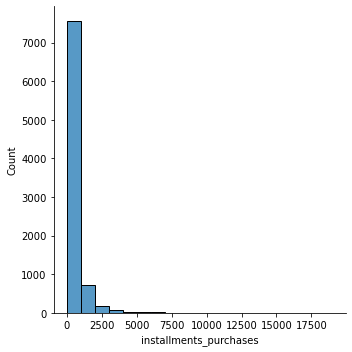

In [37]:
# explore installments_purchases distribution
hist(df, "installments_purchases", balance_bins)

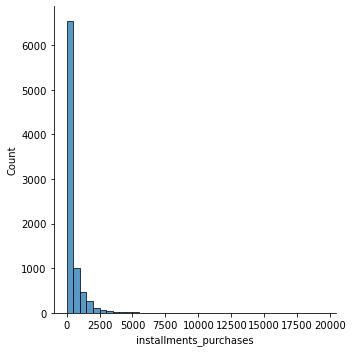

In [38]:
# explore installments_purchases distribution with smaller bin size
hist(df, "installments_purchases", balance_bins_small)

In [39]:
# outlier analysis for installments_purchases features
installments_purchases_summary, installments_purchases_outliers_observations_count = outliers_analysis(df, "installments_purchases", summary_stats)

In [40]:
installments_purchases_summary

,installments_purchases
count,1508.000000
mean,1749.866101
std,1580.298124
min,726.420000
25%,952.645000
50%,1280.120000
75%,1909.475000
max,22500.000000


In [41]:
installments_purchases_outliers_observations_count

array([7, 5, 4, 3, 2, 1], dtype=int64)

- oneoff_purchases outliers has the same profile of outliers as the purchases features
- They also have the same distributions, means they are two features but both represent the same information. 

__From the exploration of the Purchases features they have the same distribution profile, same outliesrs ranges and profile,
All of them encode the same information about the observation.__

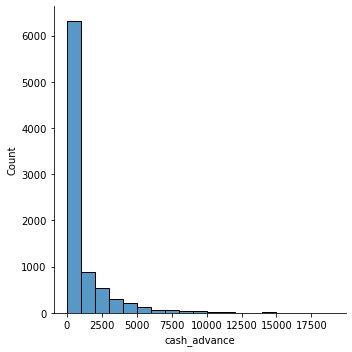

In [42]:
# explore cash_advance distribution
hist(df, "cash_advance", balance_bins)

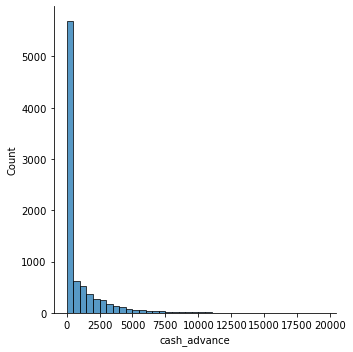

In [43]:
# explore cash_advance distribution with smaller bin size
hist(df, "cash_advance", balance_bins_small)

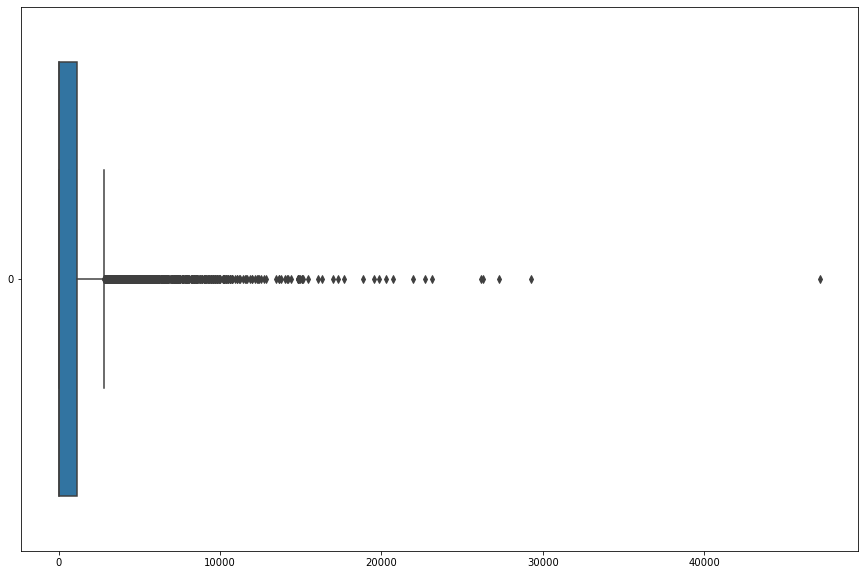

In [44]:
# boxplot of cash_advance feature
boxplot(df.cash_advance)

In [45]:
# outlier analysis for cash_advance features
cash_advance_summary, cash_advance_outliers_observations_count = outliers_analysis(df, "cash_advance", summary_stats)

In [46]:
cash_advance_summary

,cash_advance
count,1655.000000
mean,4195.600622
std,3168.521752
min,1700.074178
25%,2357.889149
50%,3216.192328
75%,4818.983386
max,47137.211760


In [47]:
cash_advance_outliers_observations_count

array([1], dtype=int64)

- all the outliers observations observed 1 time only
- the cash_advance feature has the same distributions as balance feature, but have outlier profile like purchases features

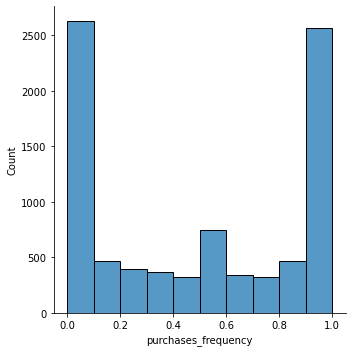

In [48]:
# explore purchases_frequency distribution
hist(df, "purchases_frequency", freq_bins)

- Purchases are equally distributed between frequent and not frequent purchases

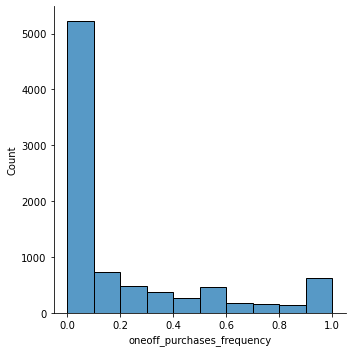

In [49]:
# explore oneoff_purchases_frequency distribution
hist(df, "oneoff_purchases_frequency", freq_bins)

- few amount of purchases obbservations re happening in one-go

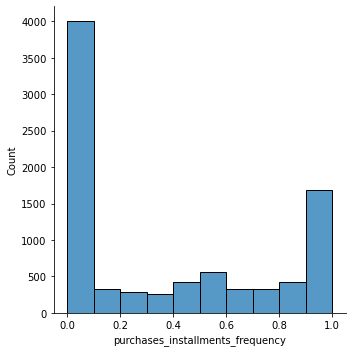

In [50]:
# explore purchases_installments_frequency distribution
hist(df, "purchases_installments_frequency", freq_bins)

- same frequency distribution as oneoff_purchases_frequency

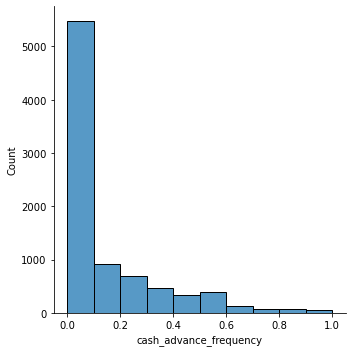

In [51]:
# explore cash_advance_frequency distribution
hist(df, "cash_advance_frequency", freq_bins)

- few amount of credit cards hascash in advance

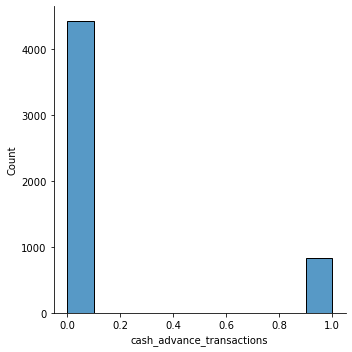

In [52]:
# explore cash_advance_transactions distribution
hist(df, "cash_advance_transactions", freq_bins)

- Few amount of transactions happens with cash in advance balance, nearly the same frequency of cash in advance, i will not consider these feature as most of the data point in the same category

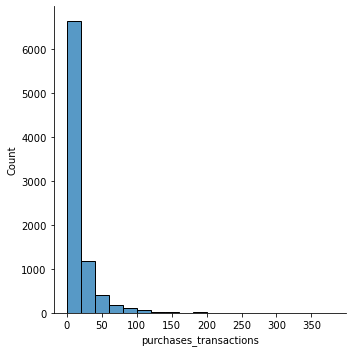

In [53]:
# explore purchases_transactions distribution
spec1_bins = np.arange(0,400, 20)
hist(df, "purchases_transactions",spec1_bins)

Numbe of purchase transactions made

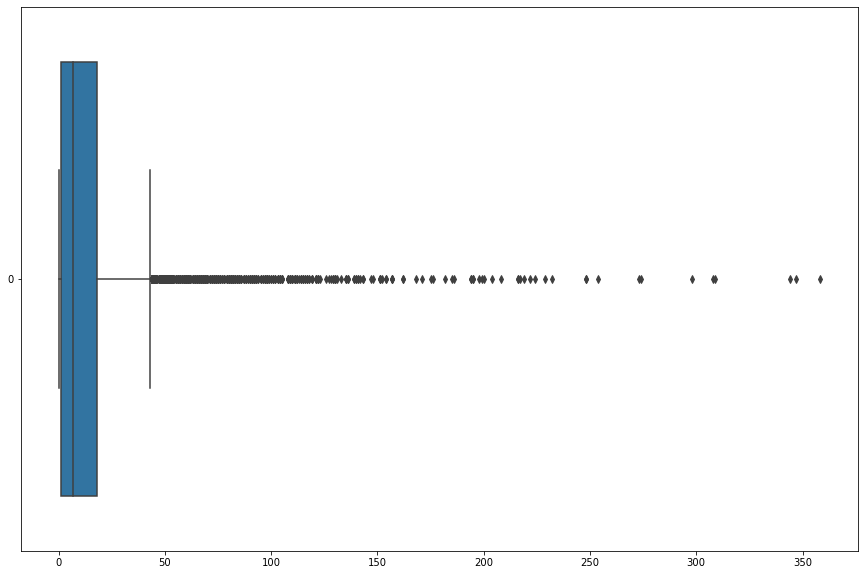

In [54]:
# boxplot for purchases_transactions
boxplot(df.purchases_transactions)

This feature has high percentage of outliers

In [55]:
df.purchases_transactions.value_counts()

0      1967
1       606
12      537
2       345
6       340
       ... 
171       1
168       1
232       1
148       1
186       1
Name: purchases_transactions, Length: 173, dtype: int64

In [56]:
df.purchases_transactions.describe()

count    8636.000000
mean       15.033233
std        25.180468
min         0.000000
25%         1.000000
50%         7.000000
75%        18.000000
max       358.000000
Name: purchases_transactions, dtype: float64

In [57]:
df.purchases_transactions.value_counts()

0      1967
1       606
12      537
2       345
6       340
       ... 
171       1
168       1
232       1
148       1
186       1
Name: purchases_transactions, Length: 173, dtype: int64

__There is a lot of Credit card did not used in any purchase transactions__

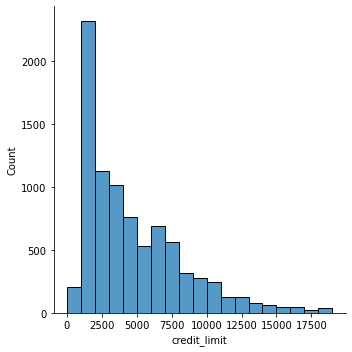

In [58]:
# explore credit_limit distribution
hist(df, "credit_limit", balance_bins)

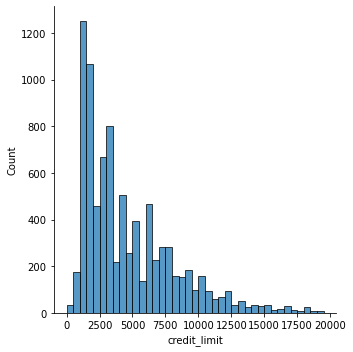

In [59]:
# explore credit_limit distribution
hist(df, "credit_limit", balance_bins_small)

In [60]:
df.credit_limit.describe()

count     8636.000000
mean      4522.091030
std       3659.240379
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: credit_limit, dtype: float64

__The Credit limit distribution is positively skewed, 75% cards credit limit is below 6500 and the fourth quartile range from 6500 to 30000__

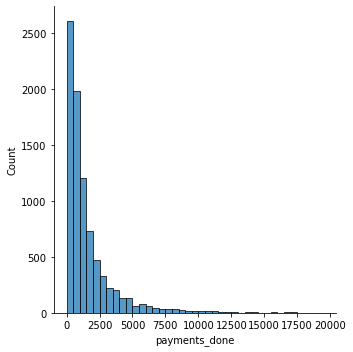

In [61]:
# explore payments_done distribution
hist(df, "payments_done", balance_bins_small)

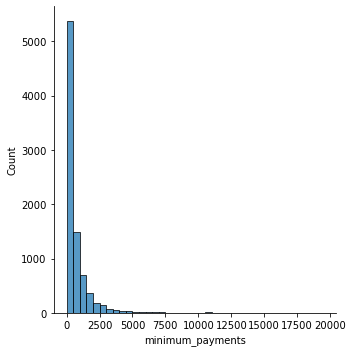

In [62]:
# explore minimum_payments distribution
hist(df, "minimum_payments", balance_bins_small)

__Payment Done, and Minimum Payments__ We will consider the one of to avoid effect of correnility

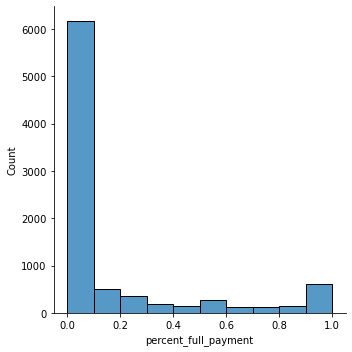

In [63]:
# explore percent_full_payment distribution
hist(df, "percent_full_payment", freq_bins)

__Payments done by the users of credit cards tend to be small as the majorty of them is below 5000__, Not important in our model as almost all of the data point in 1 category.

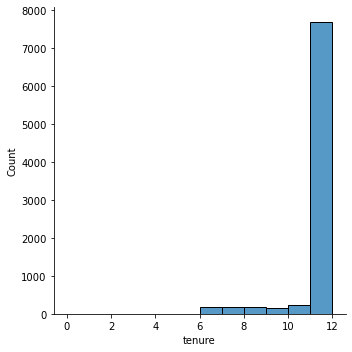

In [64]:
# explore tenure distribution
hist(df, "tenure", tenure_bins)

__Most of the payment tenure are 12 months__, Not important in our model as almost all of the data point in 1 category.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8636 non-null   float64
 1   balance_frequency                 8636 non-null   float64
 2   purchases                         8636 non-null   float64
 3   oneoff_purchases                  8636 non-null   float64
 4   installments_purchases            8636 non-null   float64
 5   cash_advance                      8636 non-null   float64
 6   purchases_frequency               8636 non-null   float64
 7   oneoff_purchases_frequency        8636 non-null   float64
 8   purchases_installments_frequency  8636 non-null   float64
 9   cash_advance_frequency            8636 non-null   float64
 10  cash_advance_transactions         8636 non-null   int64  
 11  purchases_transactions            8636 non-null   int64  
 12  credit

### Feature Selection

__Purchases Features__

> - purchases = purchases and oneoff_purchases 
> - purchases_transactions

>all of the three features has the same distribution, and outliers profile

__Purchases Frequecy Features__

>purchase_freq = ((( oneoff_purchases_frequency + purchases_installments_frequency) / 2) + purchases_frequency) / 2

__Cash Features__
> - credit_limit 
> - cash_advance 
> - balance

__Cash Frequency Features__

> - balance_frequency
 > -cash_advance_freqency

__Payment Features__

> payments_done 


In [66]:
# our Engineered Df
# get cash features and payment features and purchases
df_selected = df[["balance", "credit_limit", "cash_advance", "payments_done", "purchases", "oneoff_purchases", "balance_frequency", "cash_advance_frequency"]]
df_selected

,balance,credit_limit,cash_advance,payments_done,purchases,oneoff_purchases,balance_frequency,cash_advance_frequency
0,40.900749,1000.0,0.000000,201.802084,95.40,0.00,0.818182,0.000000
1,3202.467416,7000.0,6442.945483,4103.032597,0.00,0.00,0.909091,0.250000
2,2495.148862,7500.0,0.000000,622.066742,773.17,773.17,1.000000,0.000000
4,817.714335,1200.0,0.000000,678.334763,16.00,16.00,1.000000,0.000000
5,1809.828751,1800.0,0.000000,1400.057770,1333.28,0.00,1.000000,0.000000
...,...,...,...,...,...,...,...,...
8943,5.871712,500.0,0.000000,58.644883,20.90,20.90,0.500000,0.000000
8945,28.493517,1000.0,0.000000,325.594462,291.12,0.00,1.000000,0.000000
8947,23.398673,1000.0,0.000000,81.270775,144.40,0.00,0.833333,0.000000
8948,13.457564,500.0,36.558778,52.549959,0.00,0.00,0.833333,0.166667


In [67]:
# engineeer purchases frequency feature
df_selected["purchases_freq"] = round((((( df.oneoff_purchases_frequency + df.purchases_installments_frequency) / 2) + df.purchases_frequency) / 2), 2);
df_selected

C:\Users\moham\AppData\Local\Temp/ipykernel_8140/3054524020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["purchases_freq"] = round((((( df.oneoff_purchases_frequency + df.purchases_installments_frequency) / 2) + df.purchases_frequency) / 2), 2);


,balance,credit_limit,cash_advance,payments_done,purchases,oneoff_purchases,balance_frequency,cash_advance_frequency,purchases_freq
0,40.900749,1000.0,0.000000,201.802084,95.40,0.00,0.818182,0.000000,0.10
1,3202.467416,7000.0,6442.945483,4103.032597,0.00,0.00,0.909091,0.250000,0.00
2,2495.148862,7500.0,0.000000,622.066742,773.17,773.17,1.000000,0.000000,0.75
4,817.714335,1200.0,0.000000,678.334763,16.00,16.00,1.000000,0.000000,0.06
5,1809.828751,1800.0,0.000000,1400.057770,1333.28,0.00,1.000000,0.000000,0.48
...,...,...,...,...,...,...,...,...,...
8943,5.871712,500.0,0.000000,58.644883,20.90,20.90,0.500000,0.000000,0.13
8945,28.493517,1000.0,0.000000,325.594462,291.12,0.00,1.000000,0.000000,0.71
8947,23.398673,1000.0,0.000000,81.270775,144.40,0.00,0.833333,0.000000,0.58
8948,13.457564,500.0,36.558778,52.549959,0.00,0.00,0.833333,0.166667,0.00


In [68]:
df_selected.describe()

,balance,credit_limit,cash_advance,payments_done,purchases,oneoff_purchases,balance_frequency,cash_advance_frequency,purchases_freq
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,4522.091030,994.175523,1784.478099,1025.433874,604.901438,0.895035,0.137604,0.391791
std,2095.571300,3659.240379,2121.458303,2909.810090,2167.107984,1684.307803,0.207697,0.201791,0.327896
min,0.000000,50.000000,0.000000,0.049513,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148.095189,1600.000000,0.000000,418.559237,43.367500,0.000000,0.909091,0.000000,0.060000
50%,916.855459,3000.000000,0.000000,896.675701,375.405000,44.995000,1.000000,0.000000,0.380000
75%,2105.195853,6500.000000,1132.385490,1951.142090,1145.980000,599.100000,1.000000,0.250000,0.730000
max,19043.138560,30000.000000,47137.211760,50721.483360,49039.570000,40761.250000,1.000000,1.500000,1.000000


In [69]:
df

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_transactions,purchases_transactions,credit_limit,payments_done,minimum_payments,percent_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


#### Data Normalization

In [70]:
scaler = StandardScaler()

In [71]:
df = scaler.fit_transform(df_selected)

In [72]:
df

array([[-0.74462486, -0.96257545, -0.46865549, ..., -0.37004679,
        -0.68195251, -0.88994211],
       [ 0.76415211,  0.67720406,  2.56855647, ...,  0.06767893,
         0.55702219, -1.19493475],
       [ 0.42660239,  0.81385235, -0.46865549, ...,  0.50540465,
        -0.68195251,  1.09251006],
       ...,
       [-0.75297728, -0.96257545, -0.46865549, ..., -0.29709491,
        -0.68195251,  0.57402257],
       [-0.75772142, -1.09922375, -0.45142164, ..., -0.29709491,
         0.14403227, -1.19493475],
       [-0.58627829, -0.90791614, -0.40876869, ..., -1.09958965,
         0.9700121 ,  0.33002846]])

### K-Means Clustering before feature investigation and feature Engineering

Finding optimal Kmeans model

[330567568120.24396, 221125013992.24475, 176076036789.78604, 152131480368.29462, 131676291636.73138, 116002653940.68192, 104562847816.233, 96702564739.9478, 89871412885.94724, 83941913624.07904, 79272111453.77705, 75760934326.89769, 72483447042.36937, 69601067506.06163, 66761683386.34846, 65009598282.24413, 62239371494.48978, 60163277616.311455, 58393927951.59261]


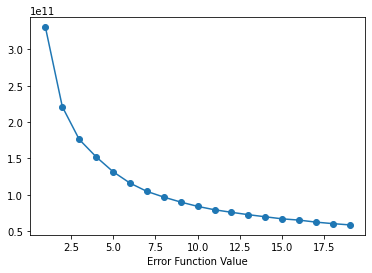

In [73]:
"""
I will use K-means for clustering the Credit Cards data, i will optmaize to solve two problems

1 - find the optimal number of clusters
Calculate the error_function for each number of clustering

"""

# init a list for the average_error values for each k-value
error_value = []

"""
pseudo code: proplem 1

1 - define the k-values range
2 - loop over k -values
        3 - calculate the value of error of each k-value
4 - plot the error-value with the k-value

get the best k value
"""
k_values = range(1, 20, 1)

for k in k_values:
    # fit the algorithm to the data
    km_model = KMeans(n_clusters = k)
    km_model.fit(df_selected)
    
    # append the value of the error
    error_value.append(km_model.inertia_)
    
print(error_value)

# plot the error function with the k -value
plt.plot(k_values, error_value)
plt.scatter(k_values, error_value)

# plot labels
plt.xlabel("Number of Clusters")
plt.xlabel("Error Function Value");

__The optimal number of cluster is [3] Clusters__

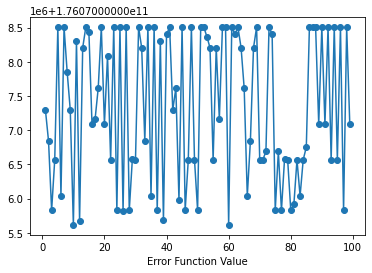

In [74]:
"""
2- find the optimal random initilization
initilize 100 times and get the lowest error_function 
"""
# init a list for the the models initilizations
inits_error_value = []

# initilaze the model list to store the models inits
models_list = []

num_of_inits = range(1, 100, 1)

for i in num_of_inits:
    # fit the algorithm to the data with k = 3
    km_model = KMeans(n_clusters = 3)
    km_model.fit(df_selected)
    
    # append the value of the error and store the model
    inits_error_value.append(km_model.inertia_)
    models_list.append(km_model)
    
    
#print(inits_error_value)

# plot the error function with the init_number
plt.plot(num_of_inits, inits_error_value)
plt.scatter(num_of_inits, inits_error_value)

# plot labels
plt.xlabel("Number of Initilization Round")
plt.xlabel("Error Function Value");

In [75]:
# summary statistics for the inits error values 
pd.Series(inits_error_value).describe()

count    9.900000e+01
mean     1.760773e+11
std      1.063703e+06
min      1.760756e+11
25%      1.760766e+11
50%      1.760773e+11
75%      1.760785e+11
max      1.760785e+11
dtype: float64

In [76]:
# get the lowest error index
index = inits_error_value.index(min(inits_error_value))
print(inits_error_value[index])

176075614483.51514


In [77]:
# get the optimal model
km_model = models_list[index]
# get the silhouette_score
print(silhouette_score(df,km_model.predict(df_selected)))

0.2761408890884291


In [78]:
km_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [79]:
# investigate clusters count
Kmeans_labels = pd.Series(km_model.labels_)

In [80]:
Kmeans_labels.value_counts()

2    6206
0    2298
1     132
dtype: int64

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count Of The points in each cluster')

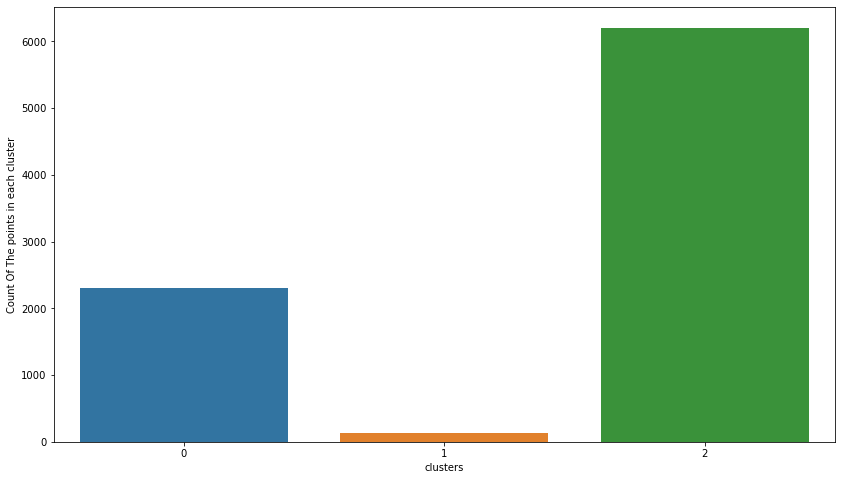

In [81]:
#plot Count Of The points in each cluster
plt.figure(figsize=(14,8))
sns.countplot(Kmeans_labels)
plt.xlabel("clusters")
plt.ylabel("Count Of The points in each cluster")

### Finding optimal Hierarchal Clustering model

In [82]:
# find the optimal number of clusters
num_cluster= np.arange(2,10)
scores=[]
for k in num_cluster:
    # Build The Model
    model = AgglomerativeClustering(n_clusters=k)
    #  generate clusters labels
    cluster_labels = model.fit_predict(df_selected)
    # get its silhouette score and append it to score list
    scores.append(silhouette_score(df_selected, cluster_labels))
    
print(scores)

[0.4122248318615499, 0.417355021709476, 0.36710212347727594, 0.38168523613910926, 0.3918270726130638, 0.3966207558390771, 0.39888867230906877, 0.3776024580631814]


In [83]:
k_scoures = {"k" : num_cluster, "silhouette_score": scores}
k_scoures_df = pd.DataFrame(k_scoures)

In [84]:
k_scoures_df

,k,silhouette_score
0,2,0.412225
1,3,0.417355
2,4,0.367102
3,5,0.381685
4,6,0.391827
5,7,0.396621
6,8,0.398889
7,9,0.377602


In [85]:
sns.scatterplot(data = k_scoures_df, x = "K", y = "silhouette_score")
plt.xlabel("Number Of clusters")
plt.ylabel("Each number of cluster model silhoutte score")

ValueError: Could not interpret value `K` for parameter `x`

In [ ]:
# get the optimal model at k = 3 (3 Clusters)
hier_model = AgglomerativeClustering(n_clusters=3)
#  generate clusters labels
cluster_labels = model.fit_predict(df_selected)
# get its silhouette score and append it to score list
silhouette_score(df_selected, cluster_labels)

In [ ]:
# investigate clusters count
hierical_labels = pd.Series(cluster_labels)

In [ ]:
hierical_labels.value_counts()

In [ ]:
# plot Count Of The points in each cluster
plt.figure(figsize=(14,8))
sns.countplot(hierical_labels)
plt.xlabel("clusters")
plt.ylabel("Count Of The points in each cluster")

### Finding optimal DBSCAN model 

In [ ]:
"""
optmize for the epslion value
start at MinPoints = 2 * dims = 2 * 8 = 16
Calculate the average distance between each point in the data set and its 16 nearest neighbors (my selected MinPts value).
using NearestNeighbors from Scikit-learn 
"""
# calculate the average distance between each point and its n_neighbors = 18.
neighbors = NearestNeighbors(n_neighbors= 18)
neighbors_fit = neighbors.fit(df_selected)
distances, indices = neighbors_fit.kneighbors(df_selected)

# Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
distances

In [ ]:
# plot the distence will produce a elbow plot
plt.plot(distances)

In [ ]:
# get the value at the point of the elbow
plt.plot(distances)
plt.ylim(0, 1500)

Zooming in on my k-distance plot, it looks like the optimal value for ε is between (800, 900)

In [ ]:
#for epslion in range(800, 900) and Minpoints = 16
sihlouette_score = []

for eps in np.linspace(800,900,50):
    # Create Model
    dbscan = DBSCAN(eps=eps,  min_samples=16)
    cluster_labels = dbscan.fit_predict(df_selected)

    # Log sihlouette score for each epslion value
    sihlouette = silhouette_score(df_selected, cluster_labels)

    sihlouette_score.append(sihlouette)

In [ ]:
# plot the sihlouette_score and its corresponding epslion value
sns.lineplot(x=np.linspace(800,900,50),y=sihlouette_score)
plt.ylabel("Sihlouette Score")
plt.xlabel("Epsilon Value")

Zooming in on my Sihlouette Score plot, it looks like the optimal value for eps is between __883__

In [ ]:
"""
optmize for the MinPoints Value
start at MinPoints = dims/2 = 4 to MinPoints = 4 * dim = 32
Calculate the average distance between each point in the data set and its 16 nearest neighbors (my selected MinPts value).
using NearestNeighbors from Scikit-learn 
"""

# build a dbscan clustering model
sihlouette_score_minpoints = []

#for minpoints in np.arange(16, 32):
for minpoints in np.arange(4,32, 1):

    # Create Model
    dbscan = DBSCAN(eps= 883 ,  min_samples = minpoints)
    cluster_labels = dbscan.fit_predict(df_selected)


    # Log sihlouette score for each minpoints value
    sihlouettescore = silhouette_score(df_selected, cluster_labels)

    sihlouette_score_minpoints.append(sihlouettescore)

In [ ]:
# plot the sihlouette_score and its corresponding minpoints value
sns.lineplot(x=np.arange(4,32, 1),y=sihlouette_score_minpoints)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

Zooming in on my Sihlouette Score plot, it looks like the optimal value for Minpoints is 10 or 24

In [ ]:
# Choose  eps = 883 and minpoints = 24 that gives highest sihlouette score
dbscan = DBSCAN(eps=885,  min_samples=24)
cluster_labels = dbscan.fit_predict(df_selected)

In [ ]:
silhouette_score(df_selected, cluster_labels)

In [ ]:
dbscan_labels = pd.Series(cluster_labels)

In [ ]:
dbscan_labels.value_counts()

In [ ]:
# Choose  eps = 883 and minpoints = 10 that gives highest sihlouette score
dbscan = DBSCAN(eps=883,  min_samples=10)
cluster_labels = dbscan.fit_predict(df_selected)

In [ ]:
silhouette_score(df_selected, cluster_labels)

In [ ]:
dbscan_labels = pd.Series(cluster_labels)

In [ ]:
dbscan_labels.value_counts()

Desnisty Based Clustering, will not produce clusters, dbscan just make two groups, one group for outliers, and the rest of the data in the second group

## conclusion
### The optimal clustering technique for this dataset
1 - KMeans Clustering, gives a resonable number of clusters __3__ and the most coherient clusters with silhouette score of __0.454__

2 - Agglomeritive Clustering  gives a resonable number of clusters __3__ with less coherient clusters with silhouette score of __0.417__

3 - Desnisty Based Clustering, will not produce clusters, dbscan just make two groups, one group for outliers, and the rest of the data in the second group